In [1]:
from __future__ import print_function
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.utils import plot_model
from keras.models import load_model

Using TensorFlow backend.


In [4]:
data=pd.read_csv('july-dataset4.csv')

In [5]:
humidity = data['Humidity']
Epoch_Time = data['Epoch_Time']
Cloud_Cover = data['Cloud_Cover']
Dew_Point = data['Dew_Point']
Humidity = data['Humidity']
Pressure = data['Pressure']
Temperature = data['Temperature']
Wind_Speed = data['Wind_Speed']
Visibility = data['Visibility']

In [6]:
def spliting_data(df, training_percent = 0.7, validation_percent = 0.15, testing_percent = 0.15, seed = None):
    np.random.seed(seed)
    total_size = training_percent + validation_percent + testing_percent
    if total_size != 1:
        raise ValueError('total size must be 1 not {}'.format(total_size))
    training_end = int(training_percent * len(df))
    validate_end = int(validation_percent * len(df)) + training_end
    perm = np.random.permutation(df.index) # randomize indexs
    training = perm[:training_end]
    validate = perm[training_end:validate_end]
    testing = perm[validate_end:]
    return training, validate, testing

In [7]:
training,validate,testing = spliting_data(data)

In [8]:
df = pd.DataFrame(data, columns=[
        'Epoch_Time','Cloud_Cover','Dew_Point',
        'Humidity','Pressure','Temperature','Wind_Speed','Visibility',
        'Power_Output'])
label_col = 'Power_Output'

,Epoch_Time,Cloud_Cover,Dew_Point,Humidity,Pressure,Temperature,Wind_Speed,Visibility,Power_Output
0,1530392400,0.36,49.98,0.63,1009.71,62.90,4.02,6.22,0
1,1530392700,0.36,49.99,0.63,1009.70,62.75,3.90,6.22,0
2,1530393000,0.36,49.99,0.63,1009.69,62.60,3.79,6.22,0
3,1530393300,0.36,50.00,0.64,1009.68,62.45,3.69,6.22,0
4,1530393600,0.36,50.00,0.64,1009.68,62.30,3.60,6.22,0
5,1530393900,0.36,50.00,0.64,1009.67,62.15,3.53,6.22,0
6,1530394200,0.35,50.00,0.65,1009.66,62.00,3.46,6.22,0
7,1530394500,0.35,50.00,0.65,1009.65,61.85,3.41,6.22,0
8,1530394800,0.35,50.00,0.65,1009.65,61.70,3.37,6.22,0
9,1530395100,0.35,50.00,0.66,1009.64,61.55,3.35,6.22,0


In [9]:
y_train = df.loc[training, [label_col]]
x_train = df.loc[training, :].drop(label_col, axis=1)
y_valid = df.loc[validate, [label_col]]
x_valid = df.loc[validate, :].drop(label_col, axis=1)

print('Size of training set: ', len(x_train))
print('Size of validation set: ', len(x_valid))
print('Size of test set: ', len(testing), '(not converted)')

Size of training set:  6249
Size of validation set:  1339
Size of test set:  1340 (not converted)


In [10]:
def norm_stats(df1, df2):
    dfs = df1.append(df2)
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)

def z_score(col, stats):
    m, M, mu, s = stats
    df2 = pd.DataFrame()
    for c in col.columns:
        df2[c] = (col[c]-mu[c])/s[c]
    return df2

stats = norm_stats(x_train, x_valid)
arr_x_train = np.array(z_score(x_train, stats))
arr_y_train = np.array(y_train)
arr_x_valid = np.array(z_score(x_valid, stats))
arr_y_valid = np.array(y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (6249, 8)
Training samples:  6249
Validation samples:  1339


In [81]:
def basic_model_3(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(80, activation="tanh", kernel_initializer='normal', input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(120, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(20, activation="relu", kernel_initializer='normal', 
        kernel_regularizer=regularizers.l1_l2(0.01), bias_regularizer=regularizers.l1_l2(0.01)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(10, activation="relu", kernel_initializer='normal'))
    t_model.add(Dropout(0.0))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer='nadam',
        metrics=[metrics.mae])
    return(t_model)

In [11]:
model = basic_model_3(arr_x_train.shape[1], arr_y_train.shape[1])
model.summary()

NameError: name 'basic_model_3' is not defined

In [12]:
epochs = 250
batch_size = 64

print('Epochs: ', epochs)
print('Batch size: ', batch_size)

Epochs:  250
Batch size:  64


In [85]:
keras_callbacks = [
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', save_best_only=True, verbose=2)
    # ModelCheckpoint('/tmp/keras_checkpoints/model.{epoch:02d}.hdf5', monitor='val_loss', save_best_only=True, verbose=0)
    # TensorBoard(log_dir='/tmp/keras_logs/model_3', histogram_freq=0, write_graph=True, write_images=True, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None),
    EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=0)
]

In [86]:
history = model.fit(arr_x_train, arr_y_train,
    batch_size=batch_size,
    epochs=epochs,
    shuffle=True,
    verbose=2, # Change it to 2, if wished to observe execution
    validation_data=(arr_x_valid, arr_y_valid),
    callbacks=keras_callbacks)

Train on 6249 samples, validate on 1339 samples
Epoch 1/250
 - 1s - loss: 322731383.0744 - mean_absolute_error: 11511.4374 - val_loss: 247228976.6094 - val_mean_absolute_error: 10166.0787
Epoch 2/250
 - 0s - loss: 155407745.3109 - mean_absolute_error: 9078.7619 - val_loss: 113091389.0545 - val_mean_absolute_error: 8095.0188
Epoch 3/250
 - 0s - loss: 108543971.8381 - mean_absolute_error: 7857.8708 - val_loss: 106524803.4593 - val_mean_absolute_error: 7611.6414
Epoch 4/250
 - 0s - loss: 103983841.1151 - mean_absolute_error: 7494.4893 - val_loss: 105964464.4839 - val_mean_absolute_error: 7510.9864
Epoch 5/250
 - 0s - loss: 104778441.3199 - mean_absolute_error: 7438.3478 - val_loss: 105621654.0344 - val_mean_absolute_error: 7466.0820
Epoch 6/250
 - 0s - loss: 103298806.4100 - mean_absolute_error: 7351.1678 - val_loss: 104710939.3279 - val_mean_absolute_error: 7414.0271
Epoch 7/250
 - 0s - loss: 101792350.4317 - mean_absolute_error: 7294.3206 - val_loss: 102928948.4929 - val_mean_absolute_e

Epoch 61/250
 - 0s - loss: 68862224.7816 - mean_absolute_error: 5844.9815 - val_loss: 61422001.2218 - val_mean_absolute_error: 5577.3086
Epoch 62/250
 - 0s - loss: 68438841.6982 - mean_absolute_error: 5840.6000 - val_loss: 60061005.8850 - val_mean_absolute_error: 5499.4053
Epoch 63/250
 - 0s - loss: 67640618.1501 - mean_absolute_error: 5778.6574 - val_loss: 59599553.4100 - val_mean_absolute_error: 5468.6113
Epoch 64/250
 - 0s - loss: 67571534.6238 - mean_absolute_error: 5767.5398 - val_loss: 59179554.6856 - val_mean_absolute_error: 5444.3756
Epoch 65/250
 - 0s - loss: 69841118.0419 - mean_absolute_error: 5881.5508 - val_loss: 58707936.0568 - val_mean_absolute_error: 5392.3324
Epoch 66/250
 - 0s - loss: 67273254.0912 - mean_absolute_error: 5774.9935 - val_loss: 58950560.4989 - val_mean_absolute_error: 5415.6467
Epoch 67/250
 - 0s - loss: 67965829.6559 - mean_absolute_error: 5776.1053 - val_loss: 58596443.6983 - val_mean_absolute_error: 5398.7456
Epoch 68/250
 - 0s - loss: 66582714.0893 

Epoch 121/250
 - 0s - loss: 52923845.5887 - mean_absolute_error: 4943.6216 - val_loss: 43503838.8678 - val_mean_absolute_error: 4436.8270
Epoch 122/250
 - 0s - loss: 51737655.5250 - mean_absolute_error: 4870.7850 - val_loss: 42740617.4249 - val_mean_absolute_error: 4371.6665
Epoch 123/250
 - 0s - loss: 52046192.7662 - mean_absolute_error: 4893.0271 - val_loss: 43041468.3794 - val_mean_absolute_error: 4424.5751
Epoch 124/250
 - 0s - loss: 51476004.7822 - mean_absolute_error: 4883.6719 - val_loss: 44079149.7028 - val_mean_absolute_error: 4516.1986
Epoch 125/250
 - 0s - loss: 53149334.3607 - mean_absolute_error: 4940.0842 - val_loss: 42671296.7558 - val_mean_absolute_error: 4358.5823
Epoch 126/250
 - 0s - loss: 52165085.3116 - mean_absolute_error: 4908.1922 - val_loss: 42798061.1680 - val_mean_absolute_error: 4396.5940
Epoch 127/250
 - 0s - loss: 51268964.3975 - mean_absolute_error: 4844.5189 - val_loss: 42847390.3630 - val_mean_absolute_error: 4421.4596
Epoch 128/250
 - 0s - loss: 507310

Epoch 181/250
 - 0s - loss: 44155618.0986 - mean_absolute_error: 4447.1532 - val_loss: 34831155.4727 - val_mean_absolute_error: 3899.4539
Epoch 182/250
 - 0s - loss: 44476454.1853 - mean_absolute_error: 4445.4706 - val_loss: 35703817.8611 - val_mean_absolute_error: 3989.1577
Epoch 183/250
 - 0s - loss: 43916631.6329 - mean_absolute_error: 4436.3514 - val_loss: 35553901.7267 - val_mean_absolute_error: 3973.3519
Epoch 184/250
 - 0s - loss: 43497903.4809 - mean_absolute_error: 4391.6240 - val_loss: 36532493.6475 - val_mean_absolute_error: 4088.0031
Epoch 185/250
 - 0s - loss: 43357045.8761 - mean_absolute_error: 4403.1020 - val_loss: 35683909.5280 - val_mean_absolute_error: 3961.8010
Epoch 186/250
 - 0s - loss: 43494617.5615 - mean_absolute_error: 4407.5032 - val_loss: 34771360.7513 - val_mean_absolute_error: 3901.4071
Epoch 187/250
 - 0s - loss: 43369251.8349 - mean_absolute_error: 4402.7651 - val_loss: 34957581.9268 - val_mean_absolute_error: 3926.7876
Epoch 188/250
 - 0s - loss: 434761

Epoch 241/250
 - 0s - loss: 38428494.0294 - mean_absolute_error: 4064.8961 - val_loss: 28742303.6117 - val_mean_absolute_error: 3478.9363
Epoch 242/250
 - 0s - loss: 37606224.0518 - mean_absolute_error: 4041.5702 - val_loss: 29159538.8364 - val_mean_absolute_error: 3459.6843
Epoch 243/250
 - 0s - loss: 37705699.7561 - mean_absolute_error: 4003.2850 - val_loss: 29387068.1359 - val_mean_absolute_error: 3543.1246
Epoch 244/250
 - 0s - loss: 36931216.5383 - mean_absolute_error: 3971.3078 - val_loss: 29363295.5220 - val_mean_absolute_error: 3555.6212
Epoch 245/250
 - 0s - loss: 37921262.5495 - mean_absolute_error: 4057.8024 - val_loss: 29785380.2016 - val_mean_absolute_error: 3547.4312
Epoch 246/250
 - 0s - loss: 37765421.0395 - mean_absolute_error: 4025.8381 - val_loss: 28028648.7767 - val_mean_absolute_error: 3376.0103
Epoch 247/250
 - 0s - loss: 36506969.3602 - mean_absolute_error: 3912.4303 - val_loss: 28612111.7834 - val_mean_absolute_error: 3469.1695
Epoch 248/250
 - 0s - loss: 365199

In [87]:
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=2)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=2)

print('Train MAE: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val MAE: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train MAE:  3328.1802 , Train Loss:  26990297.0326
Val MAE:  3524.343 , Val Loss:  29401015.2114


In [88]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['mean_absolute_error'])
    plt.plot(h['val_mean_absolute_error'])
    plt.title('Training vs Validation MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return

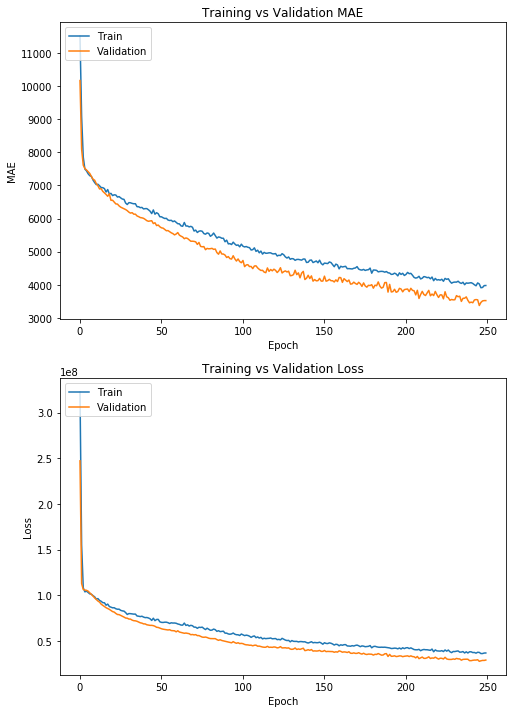

In [89]:
plot_hist(history.history, xsize=8, ysize=12)

In [13]:
savefig('sample.pdf')

NameError: name 'savefig' is not defined